## Import necessary libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Load the datasets

In [60]:

fraud_data = pd.read_csv('E:/10Academy/week 8/Technical Content/Data/Fraud_Data.csv')
ip_data = pd.read_csv('E:/10Academy/week 8/Technical Content/Data/IpAddress_to_Country.csv')
creditcard_data = pd.read_csv('E:/10Academy/week 8/Technical Content/Data/creditcard.csv')


In [61]:
print("fraud data")
display(fraud_data)
print("ip data")
display(ip_data)
print("creditcard data")
display(creditcard_data)

fraud data


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


ip data


,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


creditcard data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Step 1: Handle Missing Values

In [62]:
# Fraud_Data.csv
print("Missing values in Fraud_Data:")
print(fraud_data.isnull().sum())

Missing values in Fraud_Data:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [63]:
# IpAddress_to_Country.csv
print("Missing values in IpAddress_to_Country:")
print(ip_data.isnull().sum())

Missing values in IpAddress_to_Country:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [64]:
# creditcard.csv
print("Missing values in creditcard_data:")
print(creditcard_data.isnull().sum())

Missing values in creditcard_data:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [65]:
# Identify numerical and categorical columns
numerical_cols = fraud_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = fraud_data.select_dtypes(include=['object']).columns

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
fraud_data[numerical_cols] = num_imputer.fit_transform(fraud_data[numerical_cols])

# Impute categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
fraud_data[categorical_cols] = cat_imputer.fit_transform(fraud_data[categorical_cols])

## Step 2: Data Cleaning

In [66]:
# Fraud_Data.csv
fraud_data.drop_duplicates(inplace=True)
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# IpAddress_to_Country.csv
ip_data.drop_duplicates(inplace=True)

# creditcard.csv
creditcard_data.drop_duplicates(inplace=True)

## Step 3: Exploratory Data Analysis (EDA)

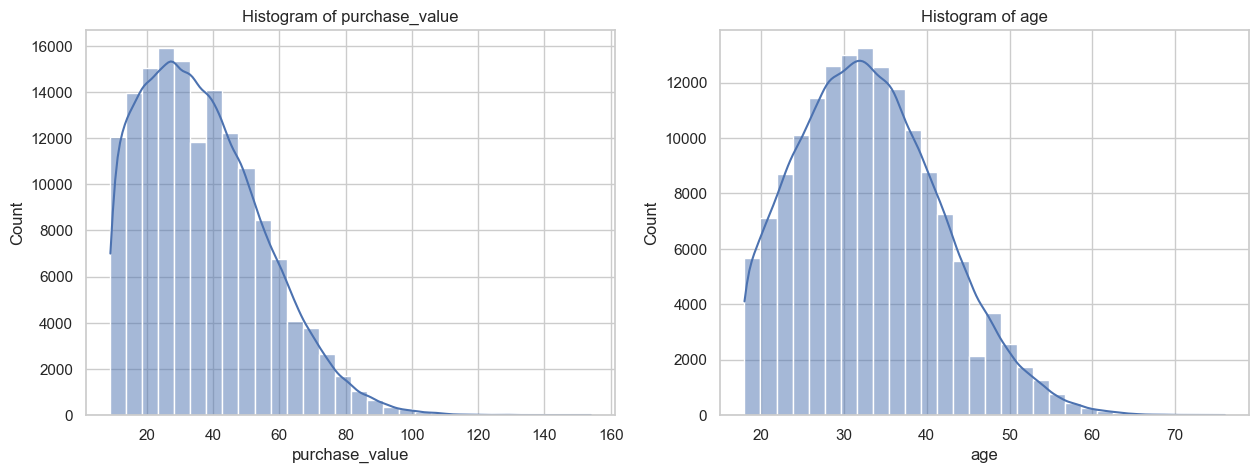

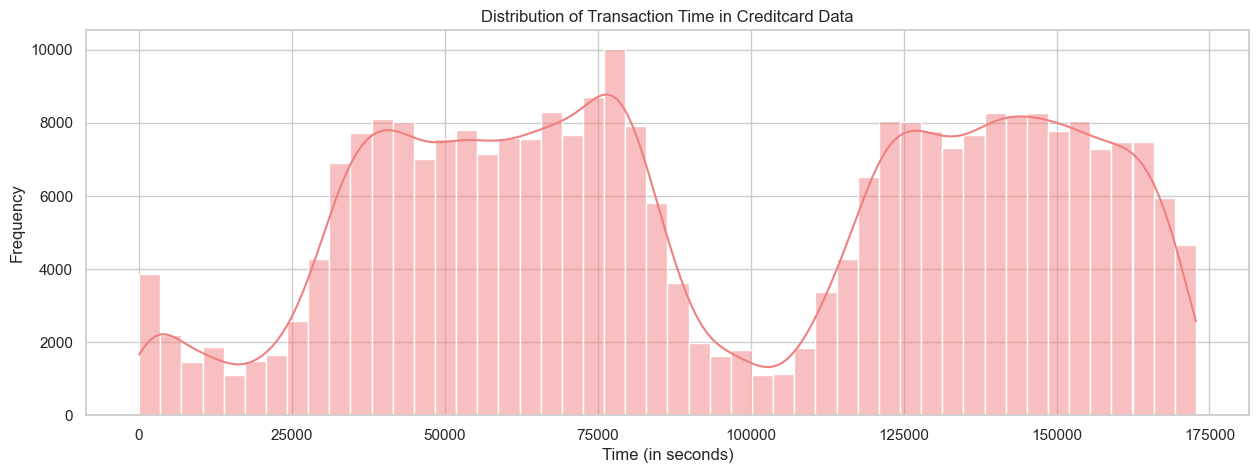

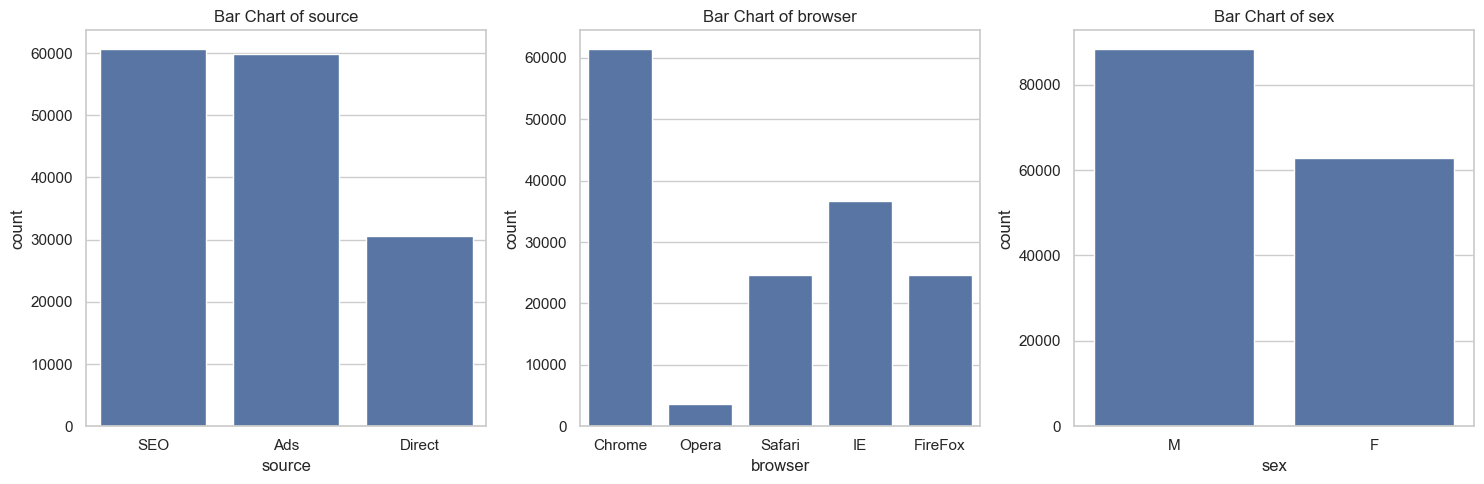

In [67]:
# General Settings
sns.set(style='whitegrid')

### 1. Univariate Analysis ###

# Univariate Analysis
# histograms for numerical features (purchase_value and age)
numerical_features = ['purchase_value', 'age']
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features, 1):
    if feature in fraud_data.columns:
        plt.subplot(1, 2, i)  # create 1 row, 2 columns subplots
        sns.histplot(fraud_data[feature], kde=True, bins=30)
        plt.title(f'Histogram of {feature}')


plt.show()    

# Time Feature Analysis
plt.figure(figsize=(15, 5))
sns.histplot(creditcard_data['Time'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Transaction Time in Creditcard Data')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.show()

# Categorical feature analysis (source, browser, sex)
categorical_features = ['source', 'browser', 'sex']  
plt.figure(figsize=(15, 5))  # adjust the figure size to fit subplots

for i, feature in enumerate(categorical_features, 1):
    if feature in fraud_data.columns:
        plt.subplot(1, 3, i)  # create 1 row, 3 columns subplots
        sns.countplot(x=feature, data=fraud_data)
        plt.title(f'Bar Chart of {feature}')
        plt.tight_layout()  # adjust layout to prevent overlap

plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24928\3014528677.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=creditcard_data, palette='Set2')


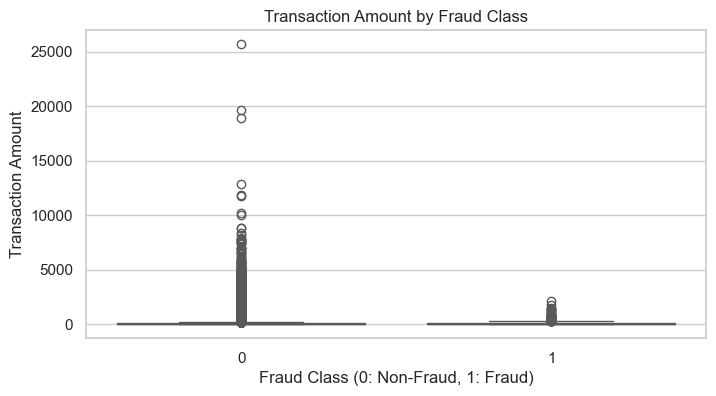

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24928\3014528677.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Time', data=creditcard_data, palette='Set3')


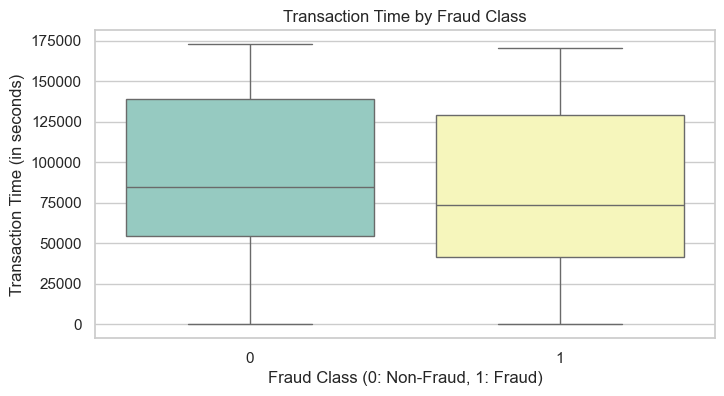

In [68]:
### 2. Bivariate Analysis ###

# Transaction Amount vs Fraud Class
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Amount', data=creditcard_data, palette='Set2')
plt.title('Transaction Amount by Fraud Class')
plt.xlabel('Fraud Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

# Time vs Fraud Class
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Time', data=creditcard_data, palette='Set3')
plt.title('Transaction Time by Fraud Class')
plt.xlabel('Fraud Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Time (in seconds)')
plt.show()

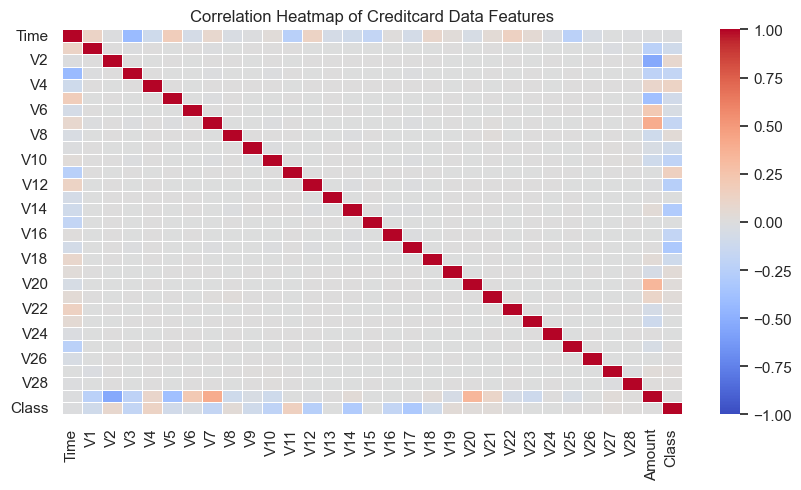

In [69]:
# Correlation Heatmap (Focusing on strong correlations)
plt.figure(figsize=(10, 5))
correlation = creditcard_data.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Creditcard Data Features')
plt.show()

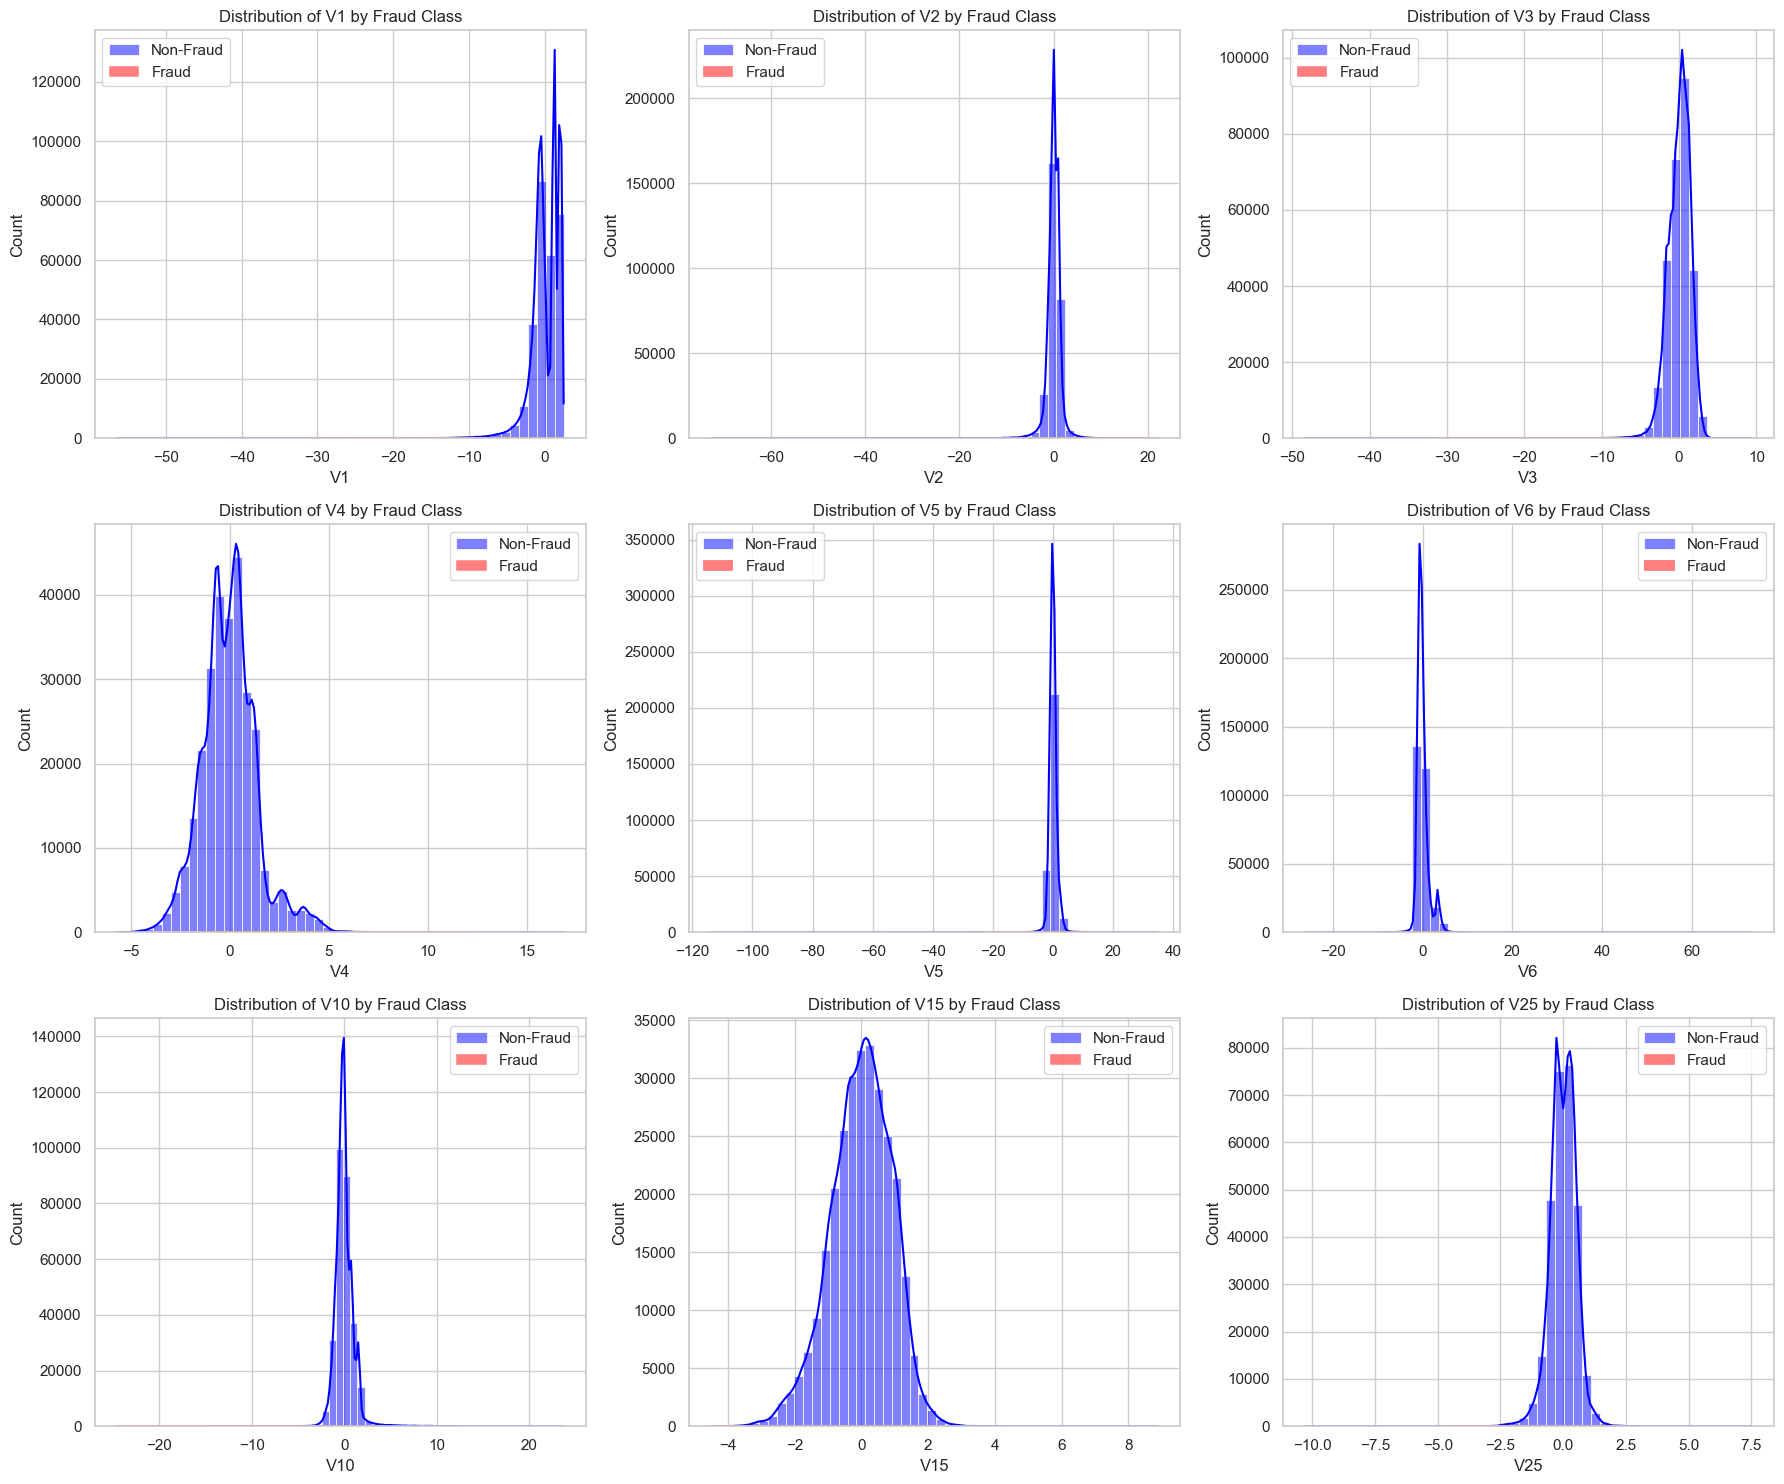

In [70]:
### Feature Distribution by Fraud Class ###

# Plot for a few selected features
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5','V6','V10','V15','V25']

# Plot feature distributions
plt.figure(figsize=(18, 15))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 3, i + 1) 
    sns.histplot(creditcard_data[creditcard_data['Class'] == 0][feature], color='blue', label='Non-Fraud', kde=True, bins=50)
    sns.histplot(creditcard_data[creditcard_data['Class'] == 1][feature], color='red', label='Fraud', kde=True, bins=50)
    plt.title(f'Distribution of {feature} by Fraud Class')
    plt.legend()
    
plt.tight_layout()
plt.show()

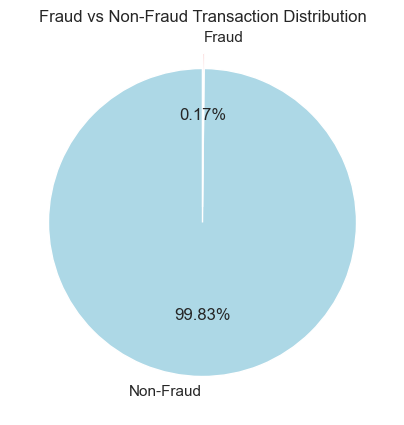

In [71]:
# Summarizing fraud and non-fraud counts
fraud_count = creditcard_data['Class'].value_counts()

# Pie chart for class distribution
plt.figure(figsize=(5, 5))
plt.pie(fraud_count, labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%', colors=['lightblue', 'lightcoral'], startangle=90, explode=[0, 0.1])
plt.title('Fraud vs Non-Fraud Transaction Distribution')
plt.show()

## Step 4: Merge Datasets for Geolocation Analysis

In [72]:
# Sort both DataFrames by ip_address and lower_bound_ip_address for asof merge
fraud_data = fraud_data.sort_values(by='ip_address')
ip_data = ip_data.sort_values(by='lower_bound_ip_address')

# Perform an asof merge on ip_address to find the closest lower_bound_ip_address
merged_data = pd.merge_asof(
    fraud_data, 
    ip_data, 
    left_on='ip_address', 
    right_on='lower_bound_ip_address',
    direction='backward'  # Ensures that we match the closest lower bound less than or equal to ip_address
)

# Now filter rows where the ip_address falls within the lower and upper bounds
merged_data = merged_data[
    (merged_data['ip_address'] >= merged_data['lower_bound_ip_address']) &
    (merged_data['ip_address'] <= merged_data['upper_bound_ip_address'])
]


display(merged_data)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547.0,2015-06-28 03:00:34,2015-08-09 03:57:29,47.0,KIXYSVCHIPQBR,SEO,Safari,F,30.0,1.677886e+07,0.0,1.677824e+07,1.677926e+07,Australia
635,220737.0,2015-01-28 14:21:11,2015-02-11 20:28:28,15.0,PKYOWQKWGJNJI,SEO,Chrome,F,34.0,1.684205e+07,0.0,1.680998e+07,1.684275e+07,Thailand
636,390400.0,2015-03-19 20:49:09,2015-04-11 23:41:23,44.0,LVCSXLISZHVUO,Ads,IE,M,29.0,1.684366e+07,0.0,1.684326e+07,1.684378e+07,China
637,69592.0,2015-02-24 06:11:57,2015-05-23 16:40:14,55.0,UHAUHNXXUADJE,Direct,Chrome,F,30.0,1.693873e+07,0.0,1.692467e+07,1.694106e+07,China
638,174987.0,2015-07-07 12:58:11,2015-11-03 04:04:30,51.0,XPGPMOHIDRMGE,SEO,Chrome,F,37.0,1.697198e+07,0.0,1.694106e+07,1.697382e+07,Thailand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131724,33024.0,2015-04-12 21:07:04,2015-05-12 22:42:35,56.0,PRYMTRKRYXEZC,Direct,Opera,F,18.0,3.757992e+09,0.0,3.757965e+09,3.758031e+09,China
131725,62132.0,2015-08-07 10:46:59,2015-08-27 22:35:23,36.0,XAZBVQEIGZMVM,Direct,Chrome,F,36.0,3.758008e+09,0.0,3.757965e+09,3.758031e+09,China
131726,363333.0,2015-02-09 07:56:12,2015-03-19 16:55:29,37.0,LPFTNUDBBWDVD,SEO,FireFox,M,42.0,3.758019e+09,0.0,3.757965e+09,3.758031e+09,China
131727,340800.0,2015-05-10 19:31:22,2015-05-15 09:27:33,9.0,VUDMWVCEHXMCV,Direct,Chrome,F,37.0,3.758029e+09,0.0,3.757965e+09,3.758031e+09,China


## Step 5: Feature Engineering

In [73]:
# Fraud_Data.csv

# 5.1 Transaction Frequency (Count of transactions per user)
merged_data['transaction_count'] = merged_data.groupby('user_id')['user_id'].transform('count')

# 5.2 Time-based features: Hour of the day and Day of the week for purchase_time
merged_data['hour_of_day'] = merged_data['purchase_time'].dt.hour
merged_data['day_of_week'] = merged_data['purchase_time'].dt.dayofweek

# creditcard.csv

# 5.3 Time-based features: Convert 'Time' into days
creditcard_data['time_in_days'] = creditcard_data['Time'] / (60*60*24)  # Convert seconds to days

## Step 6: Normalization and Scaling

In [74]:
# Fraud_Data.csv - Scale 'purchase_value'
scaler = StandardScaler()
merged_data['purchase_value_scaled'] = scaler.fit_transform(merged_data[['purchase_value']])

# creditcard.csv - Scale 'Amount'
creditcard_data['Amount_scaled'] = scaler.fit_transform(creditcard_data[['Amount']])

In [75]:
display(merged_data.head())

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_count,hour_of_day,day_of_week,purchase_value_scaled
634,247547.0,2015-06-28 03:00:34,2015-08-09 03:57:29,47.0,KIXYSVCHIPQBR,SEO,Safari,F,30.0,1.677886e+07,0.0,16778240.0,16779263.0,Australia,1,3,6,0.549607
635,220737.0,2015-01-28 14:21:11,2015-02-11 20:28:28,15.0,PKYOWQKWGJNJI,SEO,Chrome,F,34.0,1.684205e+07,0.0,16809984.0,16842751.0,Thailand,1,20,2,-1.197335
636,390400.0,2015-03-19 20:49:09,2015-04-11 23:41:23,44.0,LVCSXLISZHVUO,Ads,IE,M,29.0,1.684366e+07,0.0,16843264.0,16843775.0,China,1,23,5,0.385831
637,69592.0,2015-02-24 06:11:57,2015-05-23 16:40:14,55.0,UHAUHNXXUADJE,Direct,Chrome,F,30.0,1.693873e+07,0.0,16924672.0,16941055.0,China,1,16,5,0.986342
638,174987.0,2015-07-07 12:58:11,2015-11-03 04:04:30,51.0,XPGPMOHIDRMGE,SEO,Chrome,F,37.0,1.697198e+07,0.0,16941056.0,16973823.0,Thailand,1,4,1,0.767974


In [76]:
display(creditcard_data.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,time_in_days,Amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000012,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000012,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000023,-0.073813


## Step 7: Encode Categorical Features

In [77]:
categorical_features = ['source', 'browser', 'country']
merged_data= pd.get_dummies(merged_data, columns=categorical_features, drop_first=True)

le = LabelEncoder()
merged_data['sex'] = le.fit_transform(merged_data['sex'])

# No categorical features to encode in IpAddress_to_Country or creditcard datasets.
display(merged_data.head())

,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,lower_bound_ip_address,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
634,247547.0,2015-06-28 03:00:34,2015-08-09 03:57:29,47.0,KIXYSVCHIPQBR,0,30.0,1.677886e+07,0.0,16778240.0,...,False,False,False,False,False,False,False,False,False,False
635,220737.0,2015-01-28 14:21:11,2015-02-11 20:28:28,15.0,PKYOWQKWGJNJI,0,34.0,1.684205e+07,0.0,16809984.0,...,False,False,False,False,False,False,False,False,False,False
636,390400.0,2015-03-19 20:49:09,2015-04-11 23:41:23,44.0,LVCSXLISZHVUO,1,29.0,1.684366e+07,0.0,16843264.0,...,False,False,False,False,False,False,False,False,False,False
637,69592.0,2015-02-24 06:11:57,2015-05-23 16:40:14,55.0,UHAUHNXXUADJE,0,30.0,1.693873e+07,0.0,16924672.0,...,False,False,False,False,False,False,False,False,False,False
638,174987.0,2015-07-07 12:58:11,2015-11-03 04:04:30,51.0,XPGPMOHIDRMGE,0,37.0,1.697198e+07,0.0,16941056.0,...,False,False,False,False,False,False,False,False,False,False


## Final Datasets and Outputs

In [78]:
#Fraud_Data - After preprocessing
display(merged_data.head())

,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,lower_bound_ip_address,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
634,247547.0,2015-06-28 03:00:34,2015-08-09 03:57:29,47.0,KIXYSVCHIPQBR,0,30.0,1.677886e+07,0.0,16778240.0,...,False,False,False,False,False,False,False,False,False,False
635,220737.0,2015-01-28 14:21:11,2015-02-11 20:28:28,15.0,PKYOWQKWGJNJI,0,34.0,1.684205e+07,0.0,16809984.0,...,False,False,False,False,False,False,False,False,False,False
636,390400.0,2015-03-19 20:49:09,2015-04-11 23:41:23,44.0,LVCSXLISZHVUO,1,29.0,1.684366e+07,0.0,16843264.0,...,False,False,False,False,False,False,False,False,False,False
637,69592.0,2015-02-24 06:11:57,2015-05-23 16:40:14,55.0,UHAUHNXXUADJE,0,30.0,1.693873e+07,0.0,16924672.0,...,False,False,False,False,False,False,False,False,False,False
638,174987.0,2015-07-07 12:58:11,2015-11-03 04:04:30,51.0,XPGPMOHIDRMGE,0,37.0,1.697198e+07,0.0,16941056.0,...,False,False,False,False,False,False,False,False,False,False


In [79]:
# Creditcard Data - After preprocessing
display(creditcard_data.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,time_in_days,Amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000012,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000012,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000023,-0.073813


In [80]:
# Summary of Dataset Shapes
print(f"merged_data shape: {merged_data.shape}")
print(f"Fraud_Data shape: {fraud_data.shape}")
print(f"IpAddress_to_Country shape: {ip_data.shape}")
print(f"Creditcard shape: {creditcard_data.shape}")


merged_data shape: (129146, 201)
Fraud_Data shape: (151112, 11)
IpAddress_to_Country shape: (138846, 3)
Creditcard shape: (283726, 33)


### saving the data

In [81]:
# Save the preprocessed Fraud_Data.csv
fraud_data.to_csv('C:/Users/Administrator/Documents/kifiya/Week_8/clean_data/Preprocessed_Fraud_Data.csv', index=False)
#save the merged data
merged_data.to_csv('C:/Users/Administrator/Documents/kifiya/Week_8/clean_data/merged_data.csv', index=False)

# Save the preprocessed IpAddress_to_Country.csv
ip_data.to_csv('C:/Users/Administrator/Documents/kifiya/Week_8/clean_data/Preprocessed_IpAddress_to_Country.csv', index=False)

# Save the preprocessed creditcard.csv
creditcard_data.to_csv('C:/Users/Administrator/Documents/kifiya/Week_8/clean_data/Preprocessed_Creditcard_Data.csv', index=False)